#Data Mining - Project 1

**MOUNT DRIVE**

In [ ]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

from google.colab import drive
drive.mount('/content/gdrive')

Location = r'/content/gdrive/MyDrive/Data_Mining/Project1/marketing_campaign.csv'

Mounted at /content/gdrive


**QUESTION 1**

In [ ]:
# Create Dataframe
df = pd.read_csv(Location, sep='\t')

# Convert data of Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df = df.dropna()

**QUESTION 2**

Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Marital Status:
BEFORE: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
AFTER: ['Single' 'Together' 'Married' 'Divorced' 'Widow']


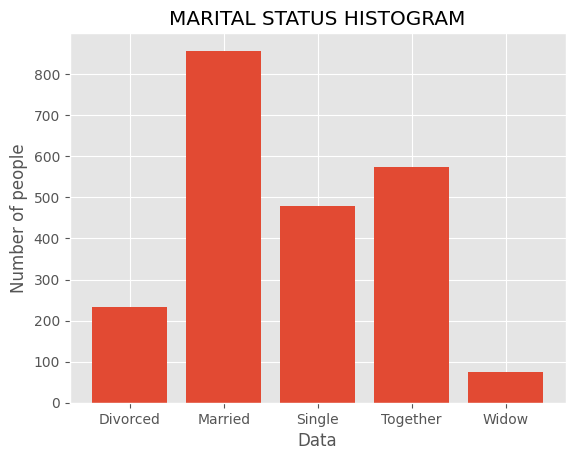

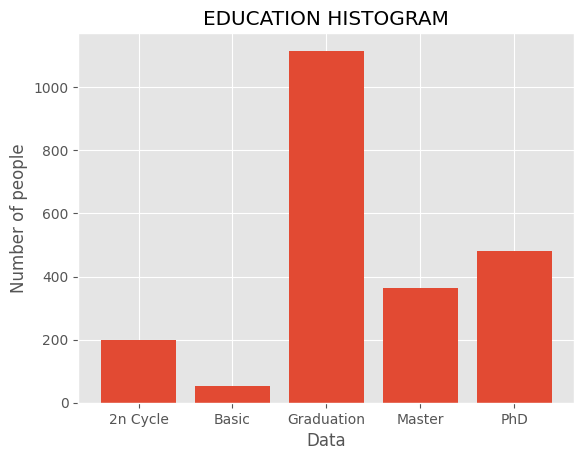

In [ ]:
# Print the unique values of Marital_Status and Education
print("Education: " + str(df['Education'].unique()) + '\n')
print("Marital Status:\nBEFORE: " + str(df['Marital_Status'].unique()))

# Replace values in Marital_Status
df = df.replace('YOLO', 'Single')
df = df.replace('Alone', 'Single')
df = df.replace('Absurd', 'Single')
print("AFTER: " + str(df['Marital_Status'].unique()))

# Plot for Marital Status
labels, counts = np.unique(df['Marital_Status'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Data')
plt.ylabel('Number of people')
plt.title('MARITAL STATUS HISTOGRAM')
plt.show()

# Plot for Education
labels, counts = np.unique(df['Education'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Data')
plt.ylabel('Number of people')
plt.title('EDUCATION HISTOGRAM')
plt.show()

**QUESTION 3**

We print the first 5 lines of the dataframe to show the new columns that we created.

In [ ]:
import datetime

today = datetime.datetime.now()

# A
df['Customer_For'] = (today - df['Dt_Customer']).dt.days
df['Customer_For'] = df['Customer_For'] - df['Recency']

# B
current_year = today.year
df['Age'] = current_year - df['Year_Birth']

# Γ
df['Spent'] = df['MntFruits'] + df['MntWines'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Δ
df['Children'] = df['Kidhome'] + df['Teenhome']

# E
df.loc[df['Marital_Status'] == 'Married', 'Family_Size'] = df['Children'] + 2
df.loc[df['Marital_Status'] != 'Married', 'Family_Size'] = df['Children'] + 1
df = df.astype({'Family_Size':'int'})

# ΣΤ
df['Is_Parent'] = df['Children'] > 0

# Z
df.loc[(df['Marital_Status'] == 'Together') | (df['Marital_Status'] == 'Married'), 'Living_With'] = 'Partner'
df.loc[(df['Marital_Status'] != 'Together') & (df['Marital_Status'] != 'Married'), 'Living_With'] = 'Alone'

# H
df.loc[(df['Age'] >= 21) & (df['Age'] <= 30), 'Age_Group'] = '21-30'
df.loc[(df['Age'] >= 31) & (df['Age'] <= 40), 'Age_Group'] = '31-40'
df.loc[(df['Age'] >= 41) & (df['Age'] <= 50), 'Age_Group'] = '41-50'
df.loc[(df['Age'] >= 51) & (df['Age'] <= 60), 'Age_Group'] = '51-60'
df.loc[(df['Age'] >= 61) & (df['Age'] <= 70), 'Age_Group'] = '61-70'
df.loc[(df['Age'] >= 71) & (df['Age'] <= 80), 'Age_Group'] = '71-80'
df.loc[(df['Age'] > 80), 'Age_Group'] = '>80'
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,3831,66,1617,0,1,False,Alone,61-70
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,3301,69,27,2,3,True,Alone,61-70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,3512,58,776,0,1,False,Partner,51-60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,3339,39,53,1,2,True,Partner,31-40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,3293,42,422,1,3,True,Partner,41-50


**QUESTION 4**

We assume that we have a normal distribution.

After testing we deleted values that had z-score$>3.5$

We print the dataframe and it's obvious that the rows have been recuced.

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols = df.select_dtypes(include=numerics).columns[1:17]

means = {}
std = {}

for col in cols:
  means[col] = df[col].mean()
  std[col] = df[col].std(ddof=0)

for col in cols:
  df = df[abs((df[col] - means[col])/std[col]) <= 3.5]

print(df)

        ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0     5524        1957  Graduation         Single  58138.0        0         0   
1     2174        1954  Graduation         Single  46344.0        1         1   
2     4141        1965  Graduation       Together  71613.0        0         0   
3     6182        1984  Graduation       Together  26646.0        1         0   
4     5324        1981         PhD        Married  58293.0        1         0   
...    ...         ...         ...            ...      ...      ...       ...   
2234  8372        1974  Graduation        Married  34421.0        1         0   
2236  4001        1946         PhD       Together  64014.0        2         1   
2237  7270        1981  Graduation       Divorced  56981.0        0         0   
2238  8235        1956      Master       Together  69245.0        0         1   
2239  9405        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  

**QUESTION 5**

We created the heatmap diagram of the correlation matrix of the arithmetic values.

The values close to 1 show that the relation between the two characteristics is proportional, but when the value is close to -1 the relation is inversely proportional.

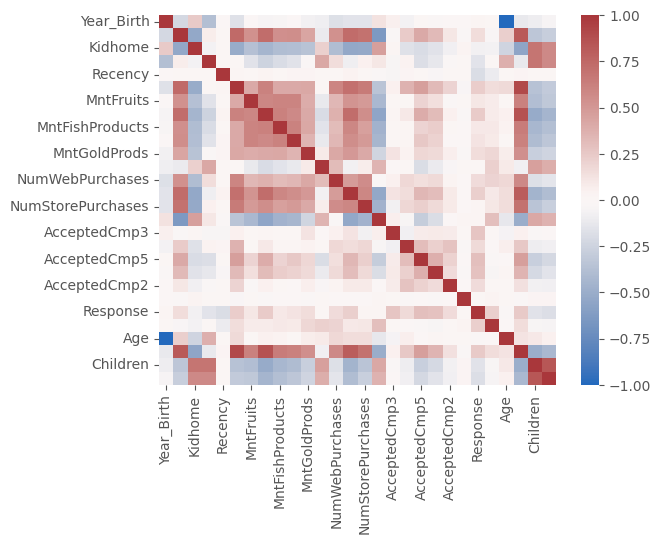

In [ ]:
import seaborn as sns

cols = list(df.select_dtypes(include=numerics).columns[1:])
cols.remove('Z_CostContact')
cols.remove('Z_Revenue')
sns.heatmap(df[cols].corr(), cmap='vlag')
plt.show()

**QUESTION 6**

Questions: 1, 2, 6, 10, 12, 13, 14, 15, 16, 17

Question 1: The biggest percentage of clients belongs in the category Married

Question 2: We found that 20 clients have filed a complaint

Question 6: The scatter plot shows that the greater the income the clients have, the more money they spent

Question 10: By comparing the two diagrams we observe that those who are in a relationship with someone have a slightly bigger income

Question 12: The greater the number of visitors, the more purchases we have

Question 13: There are 0 customers who have accepted all of the offers

Question 14-17: Plots for each question


1) Question 1:


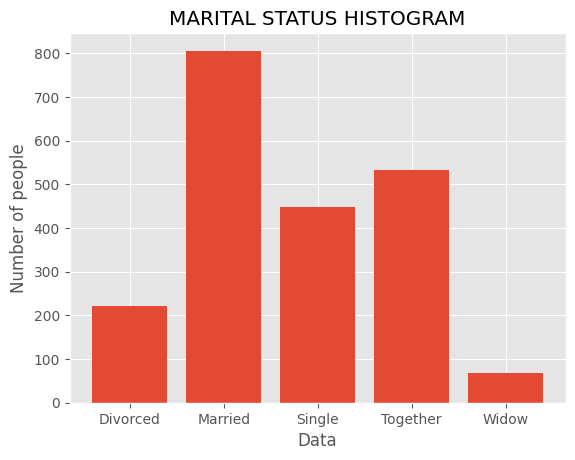


2) Question 2:
Number of people with complains: 
20

3) Question 6:


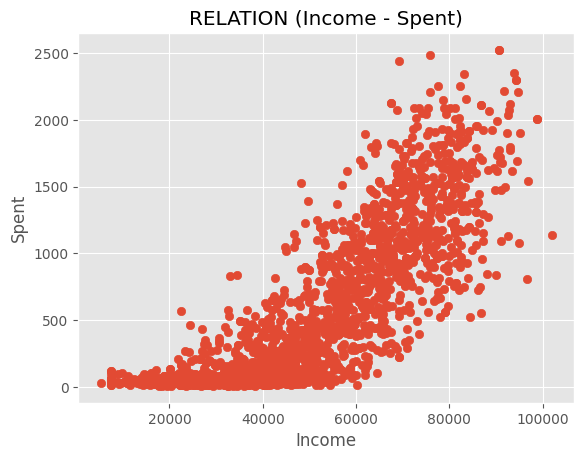


4) Question 10:


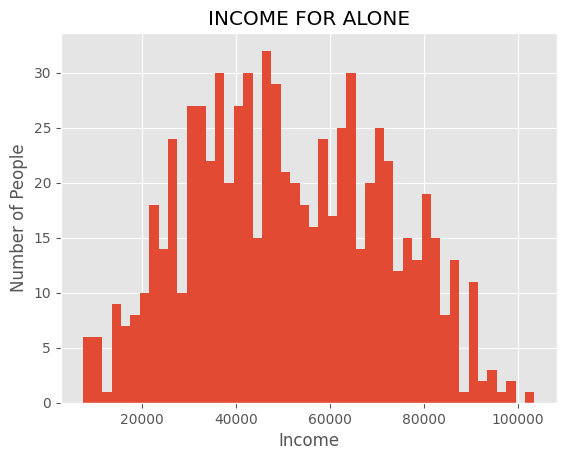

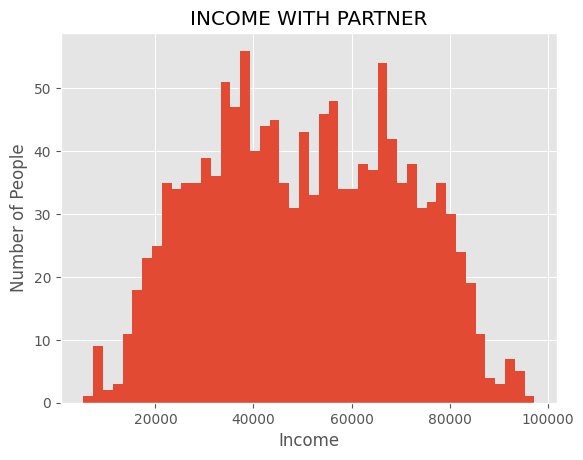


5) Question 12:


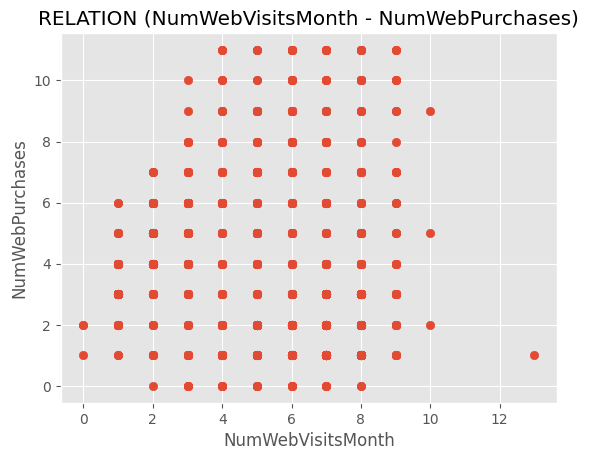


6) Question 13:
Percentage of customers that accept all of the offers from the store:
0

7) Question 14:


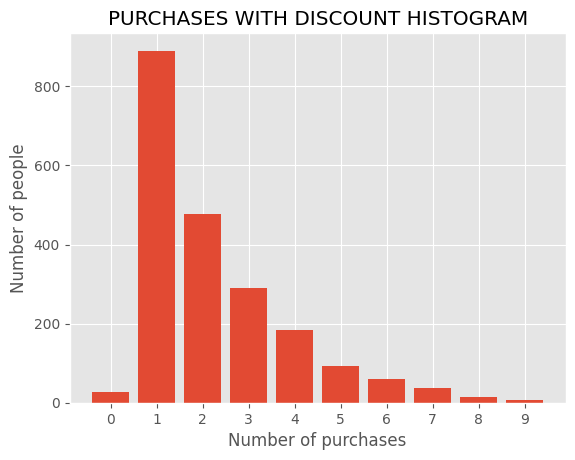


8) Question 15:


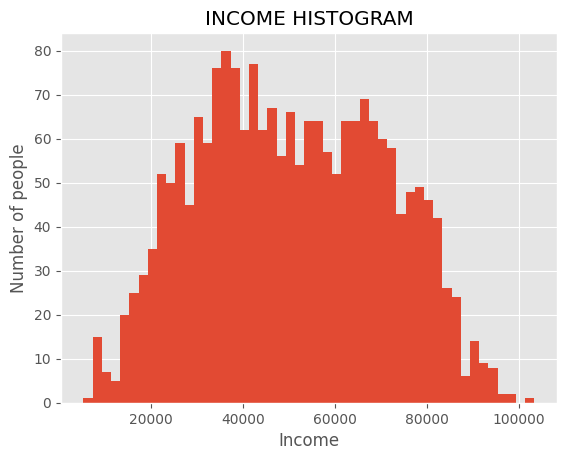


9) Question 16:


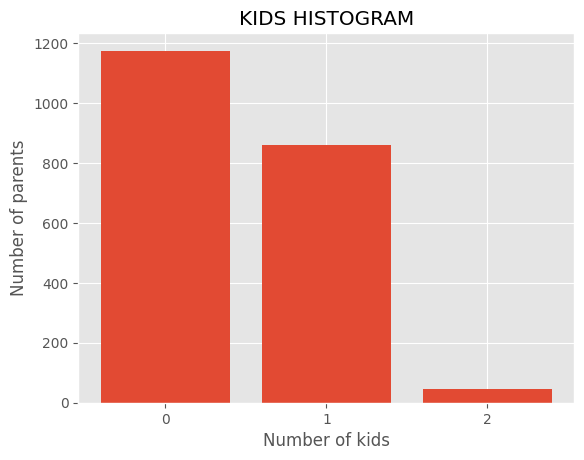


10) Question 17:


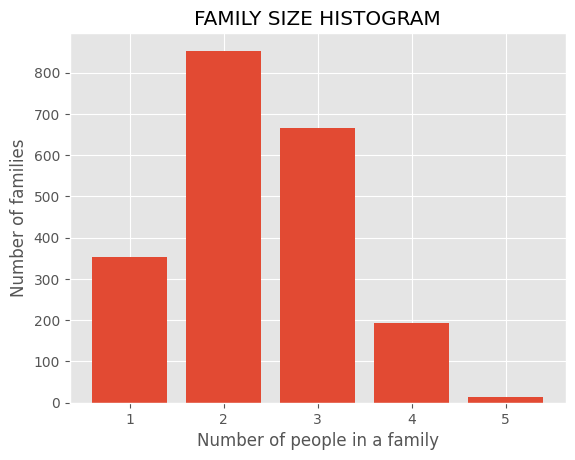

In [ ]:
binwidth = 2000

# 1) Plot for Marital Status
print("\n1) Question 1:")
labels, counts = np.unique(df['Marital_Status'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Data')
plt.ylabel('Number of people')
plt.title('MARITAL STATUS HISTOGRAM')
plt.show()

# 2) Number of customers with complaints
print("\n2) Question 2:")
print("Number of people with complains: ")
print(len(df[df['Complain'] != 0]))

# 6) Relation between income and money spent
print("\n3) Question 6:")
plt.scatter(df['Income'], df['Spent'])
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('RELATION (Income - Spent)')
plt.show()

# 10) Relation between Income and Living_With
print("\n4) Question 10:")
df1 = df.loc[df['Living_With'] == 'Alone', ['Income']]
df2 = df.loc[df['Living_With'] == 'Partner', ['Income']]
plt.hist(df1['Income'], bins=range(int(min(df1['Income'])), int(max(df1['Income'])) + binwidth, binwidth))
plt.title('INCOME FOR ALONE')
plt.xlabel('Income')
plt.ylabel('Number of People')
plt.show()
plt.hist(df2['Income'], bins=range(int(min(df2['Income'])), int(max(df2['Income'])) + binwidth, binwidth))
plt.title('INCOME WITH PARTNER')
plt.xlabel('Income')
plt.ylabel('Number of People')
plt.show()

# 12) Relation number of purchases online and number of visits on the website
print("\n5) Question 12:")
plt.scatter(df['NumWebVisitsMonth'], df['NumWebPurchases'])
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('NumWebPurchases')
plt.title('RELATION (NumWebVisitsMonth - NumWebPurchases)')
plt.show()

# 13) Percentage of customers that accept all of the offers from the store
print("\n6) Question 13:")
print("Percentage of customers that accept all of the offers from the store:")
print(len(df[(df['AcceptedCmp1'] == 1) & (df['AcceptedCmp2'] == 1) & (df['AcceptedCmp3'] == 1) & (df['AcceptedCmp4'] == 1) & (df['AcceptedCmp5'] == 1) & (df['Response'] == 1)]))

# 14) Plot for NumDealsPurchases
print("\n7) Question 14:")
labels, counts = np.unique(df['NumDealsPurchases'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Number of purchases')
plt.ylabel('Number of people')
plt.title('PURCHASES WITH DISCOUNT HISTOGRAM')
plt.show()

# 15) Plot histogram for Income
print("\n8) Question 15:")
plt.hist(df['Income'], bins=range(int(min(df['Income'])), int(max(df['Income'])) + binwidth, binwidth))
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.title('INCOME HISTOGRAM')
plt.show()

# 16) Plot for Kidhome
print("\n9) Question 16:")
labels, counts = np.unique(df['Kidhome'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Number of kids')
plt.ylabel('Number of parents')
plt.title('KIDS HISTOGRAM')
plt.show()

# 17) Plot for Family_Size
print("\n10) Question 17:")
labels, counts = np.unique(df['Family_Size'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Number of people in a family')
plt.ylabel('Number of families')
plt.title('FAMILY SIZE HISTOGRAM')
plt.show()

**QUESTION 7**

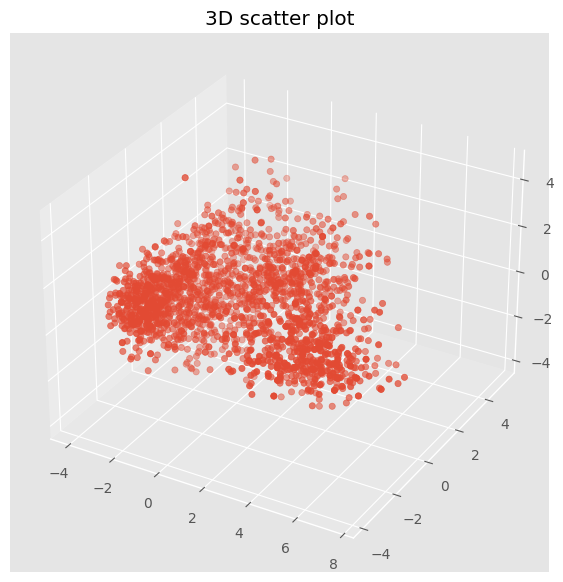

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
label_encoder = preprocessing.LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Living_With'] = label_encoder.fit_transform(df['Living_With'])

var = df.select_dtypes(include=numerics).columns[1:19]
var = list(var)
var.extend(('Age', 'Spent', 'Family_Size'))

df_copy = df[var]
df_copy = (df_copy - df_copy.min()) / df_copy.std(ddof=0) # Normalazition / Standardization
pca = PCA(n_components=3)
pca_transform = pca.fit_transform(df_copy)

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")

# Creating plot
ax.scatter3D(pca_transform[:, 0], pca_transform[:, 1], pca_transform[:, 2])
plt.title("3D scatter plot")

# show plot
plt.show()

**QUESTION 8**

We picked k=4 to be the number of clusters, because in the diagrams (with the elbow method) after the 4 clusters the relation becomes linear.

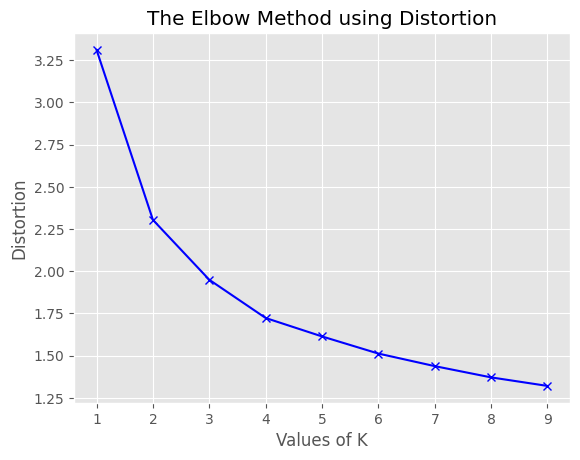

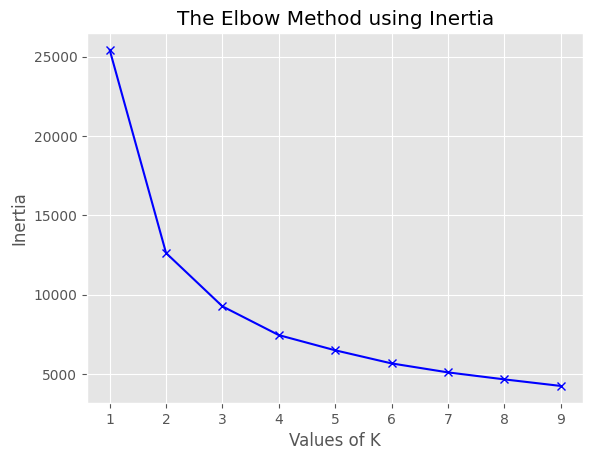

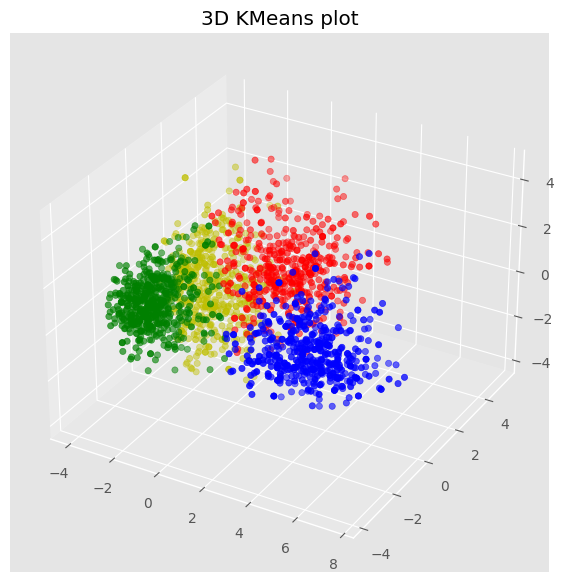

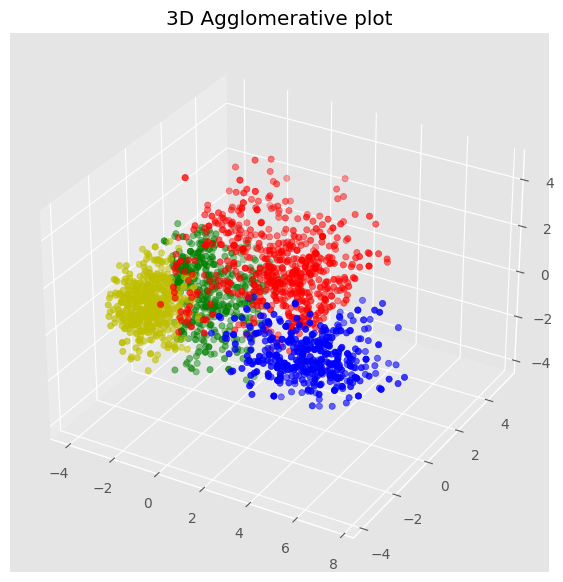

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(pca_transform)
  distortions.append(sum(np.min(cdist(pca_transform, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pca_transform.shape[0])
  inertias.append(kmeanModel.inertia_)
  mapping1[k] = sum(np.min(cdist(pca_transform, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pca_transform.shape[0]
  mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

kmeanModel = KMeans(n_clusters= 4)
labels_kmeans = kmeanModel.fit_predict(pca_transform)

# Creating figure
colors = np.array(['r', 'g', 'b', 'y'])
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(pca_transform[:, 0], pca_transform[:, 1], pca_transform[:, 2], c=colors[labels_kmeans])
plt.title("3D KMeans plot")
plt.show()

AgglomerativeModel = AgglomerativeClustering(n_clusters= 4)
labels_agglomerative = AgglomerativeModel.fit_predict(pca_transform)

# Creating figure
colors = np.array(['r', 'g', 'b', 'y'])
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(pca_transform[:, 0], pca_transform[:, 1], pca_transform[:, 2], c=colors[labels_agglomerative])
plt.title("3D Agglomerative plot")
plt.show()

**QUESTION 9**

We used the k-means method for the profile of the clusters.

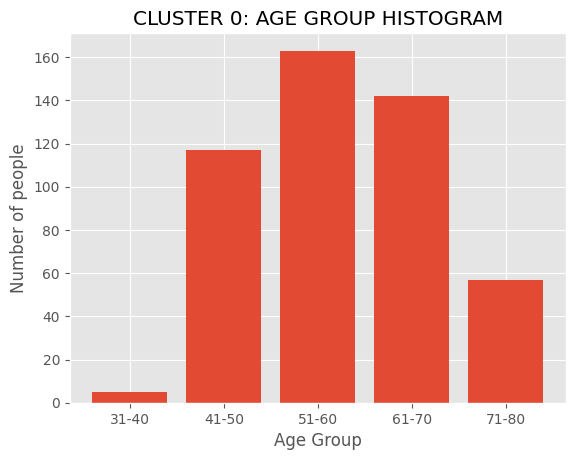

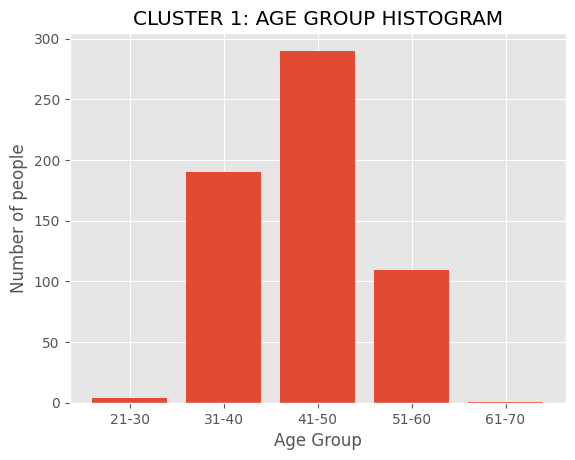

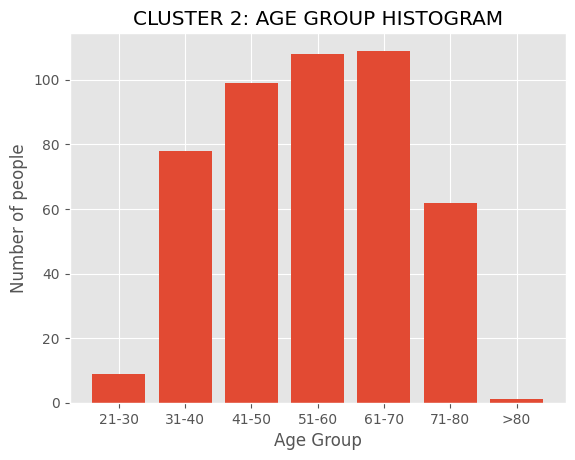

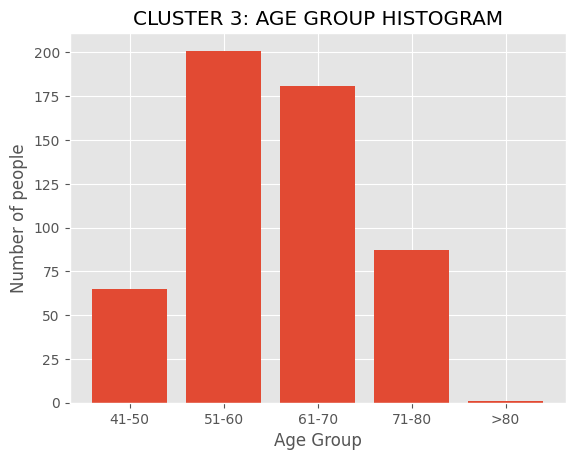

         Age  Is_Parent        Income        Spent    MntWines  MntFruits  \
0  58.188017   0.940083  60741.931818   831.297521  526.280992  26.202479   
1  44.058923   0.863636  30762.712121    99.609428   33.323232   6.417508   
2  54.298283   0.152361  75017.178112  1364.358369  620.875536  62.596567   
3  61.001869   0.902804  42133.074766   152.562617   88.657944   4.687850   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0       155.334711        34.367769         26.192149     62.919421   
1        26.469697         9.462963          6.476431     17.459596   
2       450.175966        93.718884         64.195279     72.796137   
3        30.452336         6.975701          4.635514     17.153271   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumDealsPurchases  
0         6.588843             3.493802           8.239669           3.520661  
1         2.220539             0.518519           3.164983           1.865320  
2         5.100858

In [ ]:
mean_list = ['Age', 'Is_Parent', 'Income', 'Spent', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
means = pd.DataFrame(columns=mean_list)

for i in range(0, 4):
  pos = [x for x in range(len(labels_kmeans)) if labels_kmeans[x] == i]
  cluster = df.iloc[pos]
  mean_dict = {}
  for col in mean_list:
    mean_dict[col] = cluster[col].mean()
  means = means.append(mean_dict, ignore_index=True)

  cluster = cluster.sort_values(by='Age_Group')
  labels, counts = np.unique(cluster['Age_Group'], return_counts=True)
  plt.bar(labels, counts, align='center')
  plt.gca().set_xticks(labels)
  plt.xlabel('Age Group')
  plt.ylabel('Number of people')
  plt.title('CLUSTER ' + str(i) + ': AGE GROUP HISTOGRAM')
  plt.show()

print(means)

**Χαρακτηριστικά Clusters**

<u>Cluster 0</u>:

* The biggest percentage is of age 50-70
* The majority are parents
* Relatively low income
* The spend relatively less money
* They spent most of their money on wine
* They generally don't buy from catalogues

<u>Cluster 1</u>:

* The majority are not parents
* They have the highest income
* They spent more
* They spend most of their money on wine and meat
* They have made most of their purchases in physical stores
* They don't seem to care much about discounts

<u>Cluster 2</u>:

* The biggest percentage is of age 40-70
* The majority are parents
* Relatively high income
* They spent most of their money on wine
* The clients of this cluster have the most online purchases in comparison to the clients of other clusters
* They have made most of their purchases in physical stores
* They have the biggest interest for discounts

<u>Cluster 3</u>:

* They are of age 30-60
* They are parents
* They have the lowest income in comparison to the other clusters
* They spent most of their money on wine
* They generally don't buy from catalogues

**Conclusions**

The most important clients for the company belong in the clusters 1 and 2 because they spent the most money.

The ones who need the greatest attention by the marketing team of the store belong in the Cluster 2, because they are the ones most interested in the discounts.